# Lecture 20: The Channel Abstraction

EE-40453, Digital Radio Communications, Spring 2020

J. Nicholas Laneman, Bertrand Hochwald, & Jonathan Chisum<br>
Wireless Institute & Department of Electrical Engineering<br>
University of Notre Dame

Copyright 2020, All Rights Reserved

## Summary

In this lecture, we will start to develop the conceptual framework for communication system design based upon the "channel" abstraction.

## Motivation in Course Context

So far in the course, we have built up a number of concepts and implementations for various components and radio architectures that convert between baseband signals and passband signals as well as between sinusoidal currents and electromagnetic waves. The treatment has been bottom up, and has become rather intricate.

At a certain stage, it is helpful to fix parts of the system on the transmit side as well as the receive side in order to start to characterize and optimize link-level performance. We do this via an artificial, but incredibly important, construct called the "channel", which is illustrated in the figure below. 

<img src="images/01.png" width="80%">

## Channel Modeling

For high-level design of a communication link between a transmitter and receiver, we fix certain components at the transmit side and receive side, and we consider a target set of propagation environments in which the system is intended to operate.

Everything that is outside of our control to design we call the *channel*, and we develop a *model* for how signals input to the channel lead to output signals from the channel.

Channel modeling can be based upon a combination of approaches, including:

* Combining and analytically simplifying mathematical relationships from foundational topics

* Collecting direct measurements of the input-output relationships

* Simulations based upon either of the above

Here the foundational topics include: Electromagnetics, Antennas, Circuits, Signals and Systems, as well as Probability and Random Processes.

The general conceptual formulation of channel models is summarized in the figure below.

<img src="images/02.png" width="80%">

We consider applying one of $M\in\mathbb{Z}+$ signals $s_0(t),s_1(t),\ldots,s_{M-1}(t)$ to the input of our transmitter. Either analytically, probabilistically, or through measurements, we characterize the corresponding output signals $R_0(t),R_1(t),\ldots,R_{M-1}(t)$.

In particular, for a given determinstic input signal $s_m(t)$, we anticipate that there could be **many** possible output signals $R_m(t)$, which we model as random processes. As the figure suggests, the output realizations for a given input signal may be different from the input signal itself, and it may be possible for a given output realization to have been caused by more than one input signal. The first point relates to *degradations* caused by the channel, and the second point relates to the general *non-invertibility* of the channel. Both issues are more generally referred to as *channel impairments*.

## Channel Impairments

In coming weeks, we will be formulating models and coming up with transmit signal designs and receive processing algorithms to mitigate the following channel impairments.

* Propogation

    * Path-Loss
    * Shadowing
    * Multipath

* Interference

    * Self: Images, Intersymbol, Intercarrier, ...
    * Mutual: In-Band, Adjacent Band, ...
    
* Noise

    * Thermal
    * Quantization

* Circuit Imperfections

    * Filtering (Too Little or Too Much)
    * Non-Linearities
    * Frequency, Timing Offsets


## Simple Example: Binary Wireless Transmission in Free Space with Thermal Noise

To illustrate the general approach and how we will proceed with receiver algorithm designs, and in turn transmitter signal designs, we discuss here the simplest transmission example.

### Channel Model

Suppose that we have a wireless transmitter and receiver operating in free space with no interferers and idealized radio circuits.

We can generate baseband signals $s_0(t)$ and $s_1(t)$ to represent the bits "0" and "1", respectively. If $B$ denotes the data random variable taking values $\{0,1\}$ with equal probability $1/2$, then $s_B(t)$ denotes the corresponding signal representation.

At the transmitter, the signal $s_B(t)$ is upconverted in frequency and emitted from an antenna as electromagnetic waves. After being attenuated due to free-space propagation, the electromagnetic wave impinges on the receive antenna and generates a current due to the wave as well as thermal noise, which is then downconverted to baseband. The received baseband signal that we process can then be modeled as

$$R(t)=A s_B(t-\tau) + Z(t)$$

where $A$ denotes the attenuation of the medium and circuits, $\tau$ is a proagation delay, and $Z(t)$ is stationary, white Gaussian noise resulting from thermal and other circuit noise.

As a quick note, we observe that the transmitter circuits, wireless medium, and receiver circuits are being modeled by what we call a *baseband-equivalent* model, where the input signal is $s_B(t)$ and the output signal is $A s_B(t-\tau)$ plus the additive noise $Z(t)$. Since there are just two input signals, we can equivalently think of the model as being one with two possible received signals

$$\begin{align}
x_0(t) &:= A s_0(t-\tau) \\
x_1(t) &:= A s_1(t-\tau)
\end{align}$$

So that $R(t) = x_B(t) + Z(t)$. Often it is convenient to consider the receive processing algorithms in terms of the deterministic system output signals $x_0(t)$ and $x_1(t)$, and then translate results into the system inputs $s_0(t)$ and $s_1(t)$.

### Minimum Squared-Error Detector

From the received signal, the receiver has to decide which of the two input signals was transmitted, or which of the two predicted output signals was received. This is commonly called a *detection* problem, and specifically a *binary detection* problem since there are only two options.

Define

$$\begin{align}
E_0&:=\int_{-\infty}^{+\infty} |x_0(t)-R(t)|^2 dt \\
E_1&:=\int_{-\infty}^{+\infty} |x_1(t)-R(t)|^2 dt
\end{align}
$$

to represent the integrated squared-error between the predicted signal output and the received signal output for the two cases. Given our probabilistic modeling, these are random variables.

As one approach to making decisions in the receiver, the minimum squared-error detector is defined as

$$\hat{B} =
\begin{cases}
0 & E_0 < E_1 \\
1 & E_0 > E_1
\end{cases}$$

In the case of a tie, either decision, or a random choice between them, can be chosen.

In words, the minimum squared-error detector selects the predicted signal for which the integrated squared error with respect to the received signal is smallest. In this sense, we look for the predicted signal that is "closest" to the received signal.

We can rewrite the detector in an equivalent form that allows us to simplify the receiver processing. In particular, setting

$$\hat{B} =
\begin{cases}
0 & E_0 - E_1 < 0 \\
1 & E_0 - E_1 > 0
\end{cases}$$

we observe that we need to compute the quantity $E_0 - E_1$ and compare to the threshold of $0$.

After some algebraic manipulations, we find that

$$E_0 - E_1 = 2\mathrm{Re}\left\{ \int_{-\infty}^{\infty} R(t)(x_1(t)-x_0(t))^* dt \right\}   - \left(\int_{-\infty}^{\infty} |x_1(t)|^2 dt - \int_{-\infty}^{\infty} |x_0(t)|^2 dt \right)$$

so that the outcome $\hat{B}=0$, $E_0 - E_1 < 0$, is equivalent to the condition

$$\boxed{2\mathrm{Re}\left\{ \int_{-\infty}^{\infty} R(t)(x_1(t)-x_0(t))^* dt \right\} < \left(\int_{-\infty}^{\infty} |x_1(t)|^2 dt - \int_{-\infty}^{\infty} |x_0(t)|^2 dt \right)}$$

This boxed expression is a convenient form because the left-hand side represents the signal processing that we have to perform on the received signal $R(t)$, and the right-hand side represents a threshold that can be precomputed based upon the two predicted output signals, in particular, the difference in their energies.

### Correlation Detector 

We further observe the interesting property that the receiver should compute the correlation

$$<R(t),x_1(t)-x_0(t)> = \int_{-\infty}^{\infty} R(t)(x_1(t)-x_0(t))^* dt$$

between the received signal $R(t)$ and the difference of the two predicted output signals $x_1(t)-x_0(t)$.

To write expressions in a more compact form, we introduce the *norm* notation for the signal $s(t)$ as

$$\lVert s(t) \rVert := \sqrt{<s(t),s(t)>}=\sqrt{\int_{-\infty}^{\infty} |s(t)|^2 dt}$$

Thus, the energy of the signal is $\lVert s(t) \rVert^2$, and for any signal $s(t)$, the normalized signal $s(t)/\lVert s(t) \rVert$ has unit energy.

Then, normalizing the detector relationship by the norm $\lVert x_1(t) - x_0(t) \rVert$, we find that the decision $\hat{B}=0$ is equivalent to

$$2\mathrm{Re}\left\{\left< R(t), \frac{x_1(t)-x_0(t)}{\lVert x_1(t)-x_0(t)\rVert } \right>\right\} < \frac{\lVert x_1(t) \rVert^2 - \lVert x_0(t) \rVert^2}{\lVert x_1(t)-x_0(t)\rVert}$$

This representation of the detector corresponds to computing the real part of the correlation of the received signal $R(t)$ with the unit-energy signal

$$\frac{x_1(t) - x_0(t)}{\lVert x_1(t)-x_0(t) \rVert}$$

and comparing the result to a particular threshold.

The figure below illustrates this "correlation receiver" structure.

<img src="images/03.png" width="80%">

### Bit-Error Probability

Given the above detection rule, we can now caculate the bit-error probability, which corresponds to the bit-error rate (BER) assuming IID bits and transmissions.

By the law of total probability,the bit-error probability satisfies

$$\mathbb{P}\left[\hat{B} \neq B\right] = \mathbb{P}\left[B =0 \right] \cdot \mathbb{P}\left[\hat{B}=1 \left| B=0 \right. \right] + \mathbb{P}\left[B =1 \right] \cdot \mathbb{P}\left[\hat{B}=0 \left| B=1 \right. \right]$$

#### Conditional Error Event Given $B=0$

Suppose that the input bit is $B=0$, so that $s_0(t)$ is input to the transmitter and $x_0(t)$ is the predicted received signal from the channel model. In this case,

$$R(t) = x_0(t) + Z(t)$$

and so

$$\begin{align}
\left<R(t), \frac{x_1(t)-x_0(t)}{\lVert x_1(t)-x_0(t)\rVert }  \right> &= \left<x_0(t), \frac{x_1(t)-x_0(t)}{\lVert x_1(t)-x_0(t)\rVert }  \right> + \left<Z(t), \frac{x_1(t)-x_0(t)}{\lVert x_1(t)-x_0(t)\rVert }  \right> \\
&= \frac{<x_0(t),x_1(t)>-\lVert x_0(t) \rVert^2}{\lVert x_1(t)-x_0(t)\rVert} + \left<Z(t), \frac{x_1(t)-x_0(t)}{\lVert x_1(t)-x_0(t)\rVert }  \right> 
\end{align}$$

Thus, after some algebraic manipulations, we decide $\hat{B}=1$ given $B = 0$ if

$$\boxed{\boxed{ \mathrm{Re} \left\{ \left<Z(t), \frac{x_1(t)-x_0(t)}{\lVert x_1(t)-x_0(t)\rVert }  \right> \right\} > \frac{\lVert x_1(t) - x_0(t) \rVert}{2} }} $$

#### Conditional Error Event Given $B=1$

Suppose that the input bit is $B=1$, so that $s_1(t)$ is input to the transmitter and $x_1(t)$ is the predicted received signal from the channel model. In this case,

$$R(t) = x_1(t) + Z(t)$$

and so

$$\begin{align}
\left<R(t), \frac{x_1(t)-x_0(t)}{\lVert x_1(t)-x_0(t)\rVert }  \right> &= \left<x_1(t), \frac{x_1(t)-x_0(t)}{\lVert x_1(t)-x_0(t)\rVert }  \right> + \left<Z(t), \frac{x_1(t)-x_0(t)}{\lVert x_1(t)-x_0(t)\rVert }  \right> \\
&= \frac{\lVert x_1(t) \rVert^2 - <x_1(t),x_0(t)>}{\lVert x_1(t)-x_0(t)\rVert} + \left<Z(t), \frac{x_1(t)-x_0(t)}{\lVert x_1(t)-x_0(t)\rVert }  \right> 
\end{align}$$

Thus, after some algebraic manipulations, we decide $\hat{B}=0$ given $B=1$ if

$$\boxed{\boxed{\mathrm{Re} \left\{ \left<Z(t), \frac{x_1(t)-x_0(t)}{\lVert x_1(t)-x_0(t)\rVert }  \right> \right\}  < - \frac{\lVert x_1(t) - x_0(t) \rVert}{2}}}$$

#### Conditional Bit Error Probabilities

In both of the double boxed expressions above, we compare the result of processing the noise signal $Z(t)$ to a threshold. Since $Z(t)$ is a zero-mean, stationary white Gaussian noise process, we denote the power spectral density of the noise per dimension as $S_Z(f)=N_0 / 2$, where $N_0$ is a constant determined from the thermal noise and receiver noise figure. (We note that the notation $N_0$ is a standard convention in digital communication systems.)

Define the random variable
$$Y := \mathrm{Re} \left\{ \left<Z(t), \frac{x_1(t)-x_0(t)}{\lVert x_1(t)-x_0(t)\rVert }  \right> \right\}$$

From the properties of SWGN, and given that we are taking the inner product with a unit-energy waveform, the distribution is zero-mean Gaussian with $Y \sim N(0,N_0/2)$.

Then

$$\begin{align}
\mathbb{P}\left[\hat{B}=1 \left| B=0 \right. \right] &= \mathbb{P}\left[Y > \frac{\lVert x_1(t) - x_0(t) \rVert}{2} \right] \\
&= \mathbb{P}\left[\frac{Y}{\sqrt{N_0/2}} > \frac{\lVert x_1(t) - x_0(t) \rVert}{\sqrt{2 N_0}} \right] \\
&= Q\left( \sqrt{\frac{\lVert x_1(t) - x_0(t) \rVert^2}{2 N_0}}\right)
\end{align}$$

Note that the second equality above results from normalizing both sizes of the conditional error event by the standard deviation $\sqrt{N_0/2}$, and the third equality results from the $Q(\cdot)$ function.

Similary,

$$\begin{align}
\mathbb{P}\left[\hat{B}=0 \left| B=1 \right. \right] &= \mathbb{P}\left[Y < -\frac{\lVert x_1(t) - x_0(t) \rVert}{2} \right] \\
&= \mathbb{P}\left[-\frac{Y}{\sqrt{N_0/2}} > \frac{\lVert x_1(t) - x_0(t) \rVert}{\sqrt{2 N_0}} \right] \\
&= Q\left( \sqrt{\frac{\lVert x_1(t) - x_0(t) \rVert^2}{2 N_0}}\right)
\end{align}$$

Note that the second equality above results from the symmetry property $1-Q(-x)=Q(x)$, equivalently that, if $Y$ is zero-mean Gaussian, then $-Y$ is also zero-mean Gaussian. 

And therefore, assuming $\mathbb{P}[B=0]=\mathbb{P}[B=1]=1/2$, we have

$$\mathbb{P}\left[ \hat{B} \neq B\right] = Q\left( \sqrt{\frac{\lVert x_1(t) - x_0(t) \rVert^2}{2 N_0}}\right)$$

Finally, define the quantity

$$d_{ij} := \lVert x_1(t) - x_0(t) \rVert = \sqrt{ \int_{-\infty}^{\infty} |x_j(t) - x_i(t)|^2 dt }$$

to represent a "distance" between two signals $x_j(t)$ and $x_i(t)$. Specifically, $d_{ij}^2$ represents the energy of the difference between the two signals, and $d_{ij}^2 = 0$ only if $x_i(t)=x_j(t)$ almost everywhere.

Then

$$\boxed{\boxed{\mathbb{P}\left[ \hat{B} \neq B\right] = Q\left( \sqrt{\frac{d_{01}^2}{2 N_0}}\right)}}$$

This result is one of the most important in digital communcations, for at least two reasons. First, it completely characterizes the bit-error probability for any pair of signals in the presence of SWGN. Second, it can be used to approximate the performance of larger signal sets with $M > 2$, as we will see in later lectures.

#### Conventions on Parameterizations and Plotting

Define the (received) average energy per bit for the signal set $x_0(t)$ and $x_1(t)$ as

$$\begin{align}
E_b :=& \mathbb{P}\left[B=0\right]\cdot \lVert x_0(t) \rVert^2 + \mathbb{P}\left[B=1\right]\cdot  \lVert x_1(t) \rVert^2 \\
=& \frac{1}{2}\left(\lVert x_0(t) \rVert^2 +\lVert x_1(t) \rVert^2\right)
\end{align}$$

Then we rewrite the last double boxed equation above as follows:

$$\boxed{\boxed{\mathbb{P}\left[ \hat{B} \neq B\right] = Q\left( \sqrt{ \left(\frac{d_{01}^2}{4 E_b} \right) \left(\frac{2 E_b}{N_0}\right)}\right)}}$$

The reason for this convention is to separate the paramter $E_b / N_0$, which represents an average received signal-to-noise ratio, and the term $d_{01}^2/(4 E_b)$, which represents a "gain" of the signal set. Since $Q(\sqrt{x})$ is a decreasing function of $x$, increases in either the signal-to-noise ratio or the gain of the signal set, or both, results in a lower probability of error.

Communication engineers have a convention for plotting the bit-error probability. Specifically, we plot $\mathbb{P}[\hat{B}\neq B]$ on a log scale versus the received signal-to-noise ratio $E_b / N_0$ on a dB scale. We illustrsate this convention for two examples below.

#### Examples: OOK and ANT

Consider the NRZ rectangular pulse $p(t)=\mathrm{rect}(t/T)$ for bit period $T > 0$.

For on-off keying (OOK), we have $x_0(t)=0$ and $x_1(t)=p(t)$, so that

$$\begin{align}
d_{01}^2 &= T \\
E_b &= T / 2
\end{align}$$

and the bit-error probability is

$$P_{\mathrm{OOK}} = Q\left( \sqrt{ \frac{E_b}{N_0} } \right)$$

For antipodal signaling (ANT), we have $x_0(t)=-p(t)$ and $x_1(t)=+p(t)$, so that

$$\begin{align}
d_{01}^2 &= 4 T \\
E_b &= T
\end{align}$$

and the bit-error probability is

$$P_{\mathrm{ANT}} = Q\left( \sqrt{ \frac{2 E_b}{N_0} } \right)$$

In [1]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

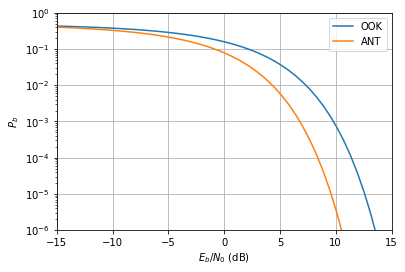

In [2]:
EbN0dB = np.linspace(-15,15)
# Invert the relationship EbN0dB = 10*log10(EbN0)
EbN0 = np.power(10.0, EbN0dB / 10.0)

# Use a lambda expression to define Q in terms of the complementary error function (erfc)
Q = lambda x : special.erfc( x / np.sqrt(2.0) ) / 2.0

Pook = Q(np.sqrt(1.0*EbN0))
Pant = Q(np.sqrt(2.0*EbN0))

plt.semilogy(EbN0dB,Pook,label="OOK")
plt.semilogy(EbN0dB,Pant,label="ANT")
plt.legend()
plt.axis([-15,15,1e-6,1])
plt.grid()

plt.xlabel('$E_b/N_0$ (dB)')
plt.ylabel('$P_b$');

Based upon its shape, such a plot is often called a "waterfall" plot. It is useful to make several observations about this plot:

* For $E_b / N_0 \rightarrow 0$ (negative dB), we see that the bit-error probability approaches $1/2$, which corresponds to simply ignoring the extremely noisy output signal and simply flipping a coin to decide the bit.

* For $E_b / N_0$ large (positive dB), we see that in the waterfall region there is a  horizontal gap of approximately $3\ \mathrm{dB}$ between the curves for OOK and ANT. This gap corresponds to the larger gain for ANT signaling of $1$ compared to the gain for OOK signaling of $1/2$. The result implies that, to achieve the same reliability, OOK requires twice the average received signal energy of ANT.

* For all practical purposes, we desire the bit-error probability to be smaller than $10^{-1}$, so we consider received $E_b / N_0 > 1$ or $0\ \mathrm{dB}$.

For these examples, it turns out that analysis of the probability of error is relatively simple. For more complicated situations, we may need to resort to simulations.

## Generalization of the Design Process

The simple example above illustrates all of the elements of the design process for communication systems once we define a channel. Specifically:

1. Freeze parts of the system as part of the channel.

2. Develop a channel model for the outputs of the channel given the inputs of the channel, often involving uncertainty modeled with random processes.

3. For selected signal set and detection rule, simply the receiver detection algorithm to the extent possible.

4. Characterize a measure of reliability of the detection algorithm, either via analysis or simulation, gaining insights on properties of the signal set that affect performance.

5. Optimize the choice of the signal set subject to various limitations on average signal energy, signal bandwidth, and so forth.
